In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Union, Any, List

import warnings
warnings.filterwarnings(action='ignore')

## 1. Загрузите файл HR.csv в pandas dataframe

In [8]:
hr_df = pd.read_csv('HR.csv')
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Признаки:

1. **satisfaction_level** - Уровень удовлетворенности работой

2. **Last_evaluation** - Время с момента последней оценки в годах

3. **number_projects** - Количество проектов, выполненных за время работы

4. **average_monthly_hours** - Среднее количество часов на рабочем месте в месяц

5. **time_spend_company** - Стаж работы в компании в годах

6. **work_accident** - Происходили ли несчастные случаи на рабочем месте с сотрудником

7. **left** - уволился ли сотрудник

8. **promotion_last_5years** - повышался ли сотрудник за последние пять лет

9. **department** - отдел в котором работает сотрудник

10. **salary** - относительный уровень зарплаты

Посмотрим на данные подробнее, проверим на пропуски

In [9]:
hr_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


Пропусков нет, данные готовы к работе

## 2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

Импортируем пакет для работы со статистиками

In [11]:
import scipy.stats as st


In [12]:
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Среди данных есть булевые (Work_accident, left, promotion_last_5years), которые могут быть неверно интерпретированны как дискретные значения.
Приведем их к соответсвующему типу, для удобства визуализации.

In [6]:
# меняем тип данных в колонках
changed_cols = hr_df[['Work_accident', 'left', 'promotion_last_5years']].astype(bool)

# копируем датасет для сохранения изначальных данных
hr_df_bool = hr_df.copy()
hr_df_bool[['Work_accident', 'left', 'promotion_last_5years']]=changed_cols

In [75]:
def describe_data(feature_name: str, df_name: pd.DataFrame):
    '''
    Получает на вход датафрем пандас и название колонки из этого датафрейма;
    В колонке данные должны иметь только один тип;
    Считает и выводит все основные описательные статистики и графики в соответствии с типом данных;
     - для количественных: среднее, медиана, мода, ст.отклонение, минимум, максимум, разброс;
        боксплот, распределение со средними значениями
     - для остальных: таблица с количеством и % долей, гистограмма
    :param feature_name: str
    :param df_name: pd.DataFrame
    :return:
    '''

    # matplotlib params
    plt.rcParams.update({'font.size': 12})

    # сохраняем Series с данными из колоники
    feature = df_name[feature_name]

    print(f'{feature_name} statistics')

    # проверяем тип данных
    # для количественных:
    if isinstance(feature[0], (np.int64, float)):
        feature_mean = feature.mean()
        feature_median = feature.median()
        feature_mode = (feature.mode())[0]
        feature_std = feature.std()
        feature_min = feature.min()
        feature_max = feature.max()

        # create plot figure and axes
        fig, (axes1, axes2) = plt.subplots(2, 1, figsize=(14,8))

        # axes1, box plot with whiskers
        sns.boxplot(x=feature,  ax=axes1, palette='mako')

        # calculate bins on unique values basis
        bins = len(list(df_name[feature_name].unique()))

        # axes2, histogram plot with gaussian kernel density estimate and mean, median and mode lines
        sns.histplot(data=feature, ax=axes2, bins=bins, kde=True, label=f'{feature_name} values distribution')
        # среднее
        plt.axvline( x=feature_mean, color='r', linestyle='dashed', linewidth=1, label=f'{feature_name} mean')
        # медиана
        plt.axvline( x=feature_median, color='y', linestyle='dashed', linewidth=1, label=f'{feature_name} median')
        # мода
        plt.axvline( x=feature_mode, color='k', linestyle='dashed', linewidth=5, label=f'{feature_name} mode')
        plt.legend()
        plt.show()

        # выводим статистики
        print(
            f'{feature_name} range: {feature_max} - {feature_min} = {feature_max-feature_min}\n'
            f'{feature_name} mode: {feature_mode}, mean: {round(feature_mean, 3)}, median: {feature_median}, '
            f'st.deviation: {round(feature_std, 3)}\n',
            '\n \n \n'
        )

    # если тип данных не количественных
    else:
        # таблица с количеством и % долей
        unique_values = pd.DataFrame(feature.value_counts())
        unique_values.columns = ['amount']
        unique_values['%'] = round(100*unique_values['amount']/(sum(unique_values['amount'])), 3)

        # histplot
        plt.figure(figsize=(8, 5))
        sns.histplot(data=feature, label=f'{feature_name} values distribution')
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.show()

        # выводим статистики
        print(
            f'Valuse for {feature_name}\n',
            unique_values,
            '\n \n \n'
        )



satisfaction_level statistics


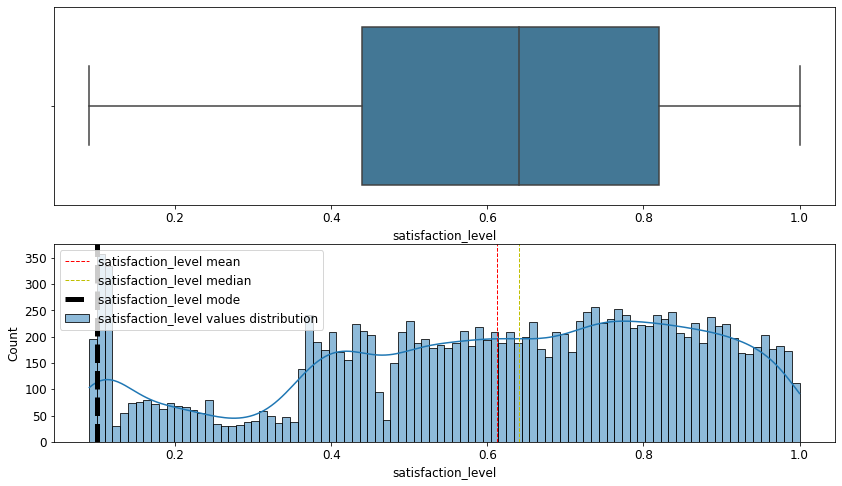

satisfaction_level range: 1.0 - 0.09 = 0.91
satisfaction_level mode: 0.1, mean: 0.613, median: 0.64, st.deviation: 0.249
 
 
 

last_evaluation statistics


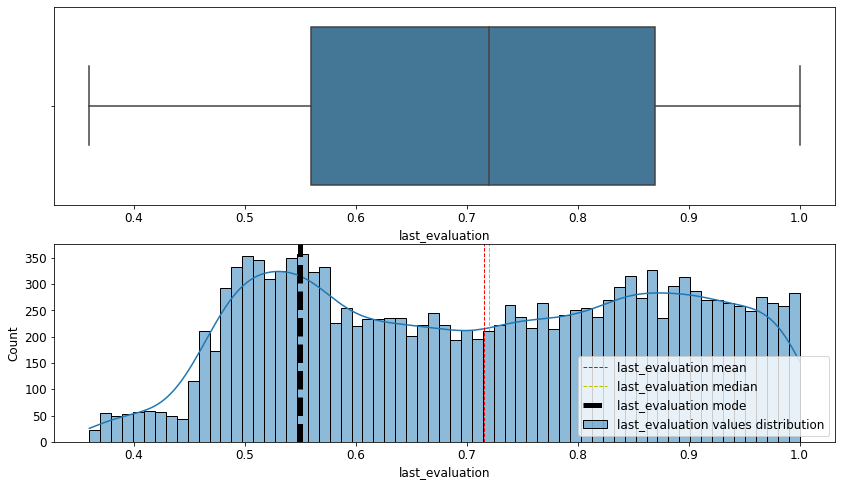

last_evaluation range: 1.0 - 0.36 = 0.64
last_evaluation mode: 0.55, mean: 0.716, median: 0.72, st.deviation: 0.171
 
 
 

number_project statistics


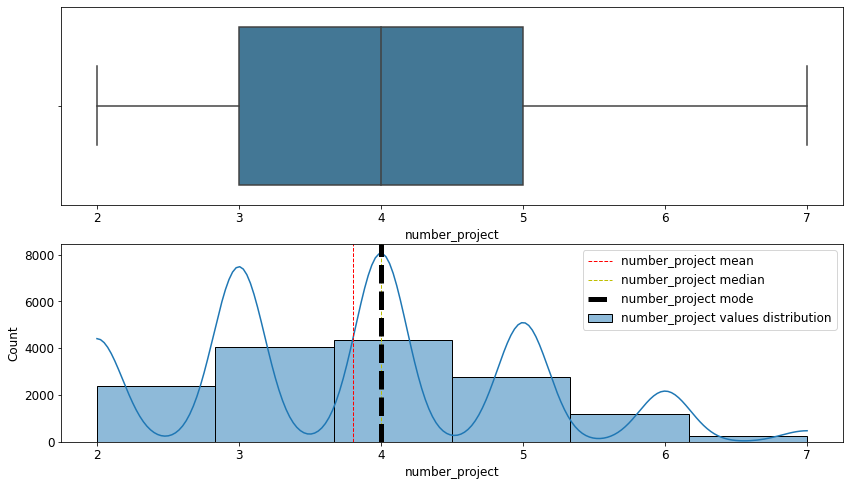

number_project range: 7 - 2 = 5
number_project mode: 4, mean: 3.803, median: 4.0, st.deviation: 1.233
 
 
 

average_montly_hours statistics


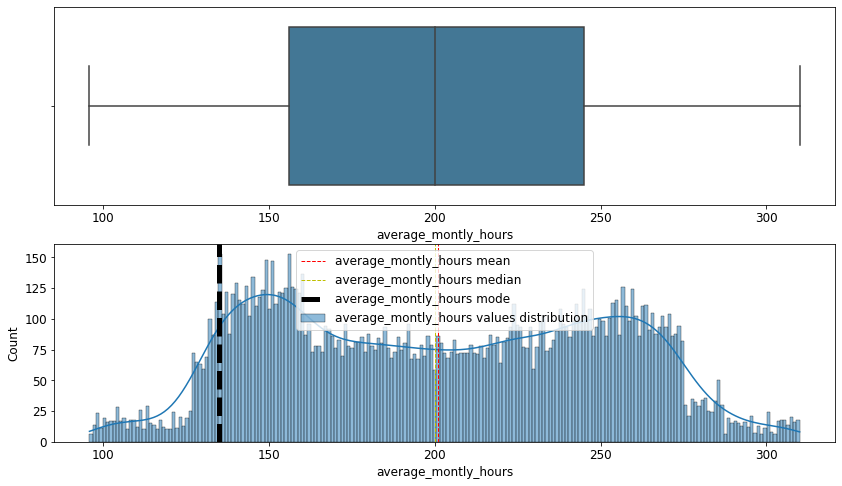

average_montly_hours range: 310 - 96 = 214
average_montly_hours mode: 135, mean: 201.05, median: 200.0, st.deviation: 49.943
 
 
 

time_spend_company statistics


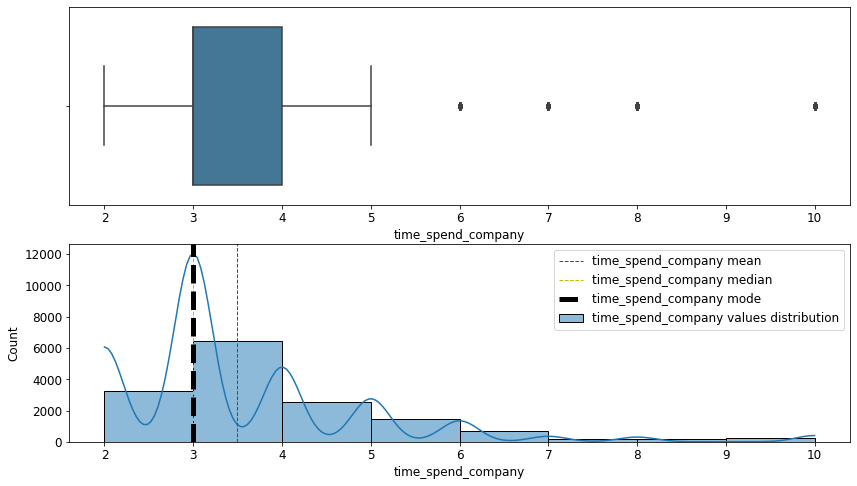

time_spend_company range: 10 - 2 = 8
time_spend_company mode: 3, mean: 3.498, median: 3.0, st.deviation: 1.46
 
 
 

Work_accident statistics


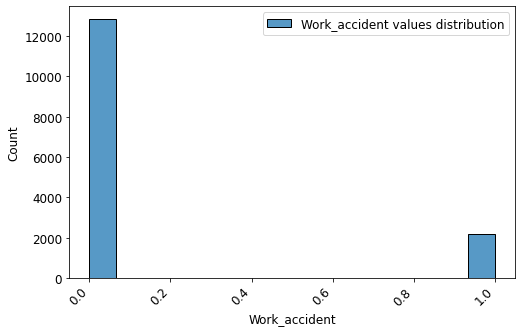

Valuse for Work_accident
        amount       %
False   12830  85.539
True     2169  14.461 
 
 

left statistics


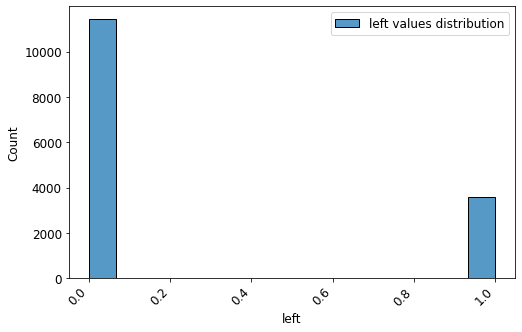

Valuse for left
        amount       %
False   11428  76.192
True     3571  23.808 
 
 

promotion_last_5years statistics


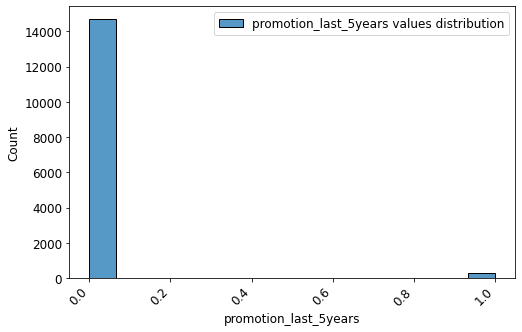

Valuse for promotion_last_5years
        amount       %
False   14680  97.873
True      319   2.127 
 
 

department statistics


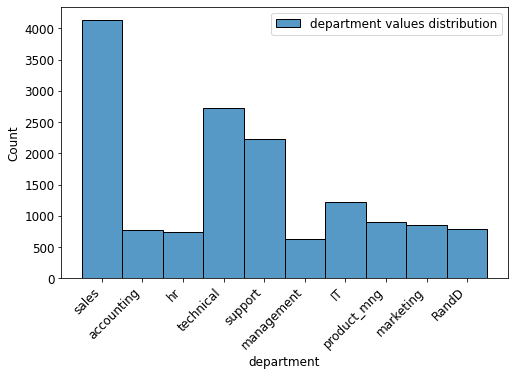

Valuse for department
              amount       %
sales          4140  27.602
technical      2720  18.135
support        2229  14.861
IT             1227   8.181
product_mng     902   6.014
marketing       858   5.720
RandD           787   5.247
accounting      767   5.114
hr              739   4.927
management      630   4.200 
 
 

salary statistics


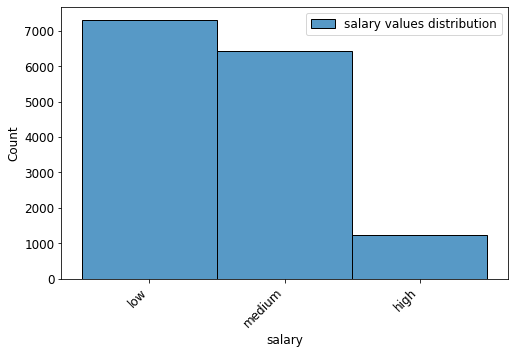

Valuse for salary
         amount       %
low       7316  48.777
medium    6446  42.976
high      1237   8.247 
 
 



In [76]:
# Для каждой фичи, в заивисомсти от типа данных считаем основные статистики и визуализируем с помощью графиков
column_names = hr_df.columns.to_list()
for col in column_names:
    describe_data(feature_name=col, df_name=hr_df)



Чтобы составить более корректное представление о распределении значений переменных,
лучше всего смотреть не только сами значения конкретных описательных статистик,
но и визуализировать их на графике распределений.
Визуализации помогают дать "интуицию" о характере поведения переменной. И в дальнейшем упрощают работу с ней.

Например, линии средних на графиках наглядно показывают, что визуально не всегда можно определить средние значени.
Особенно это касается моды на гистограмме, т.к. мы имеем дело с промежутками, а не с отдельными значениями,
при большом количестве значений.


## 3.1. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
## 3.2. Определите две самые скоррелированные и две наименее скоррелированные переменные.

Делаем подвыборку количественных переменных

In [77]:
hr_quant = hr_df[['satisfaction_level', 'last_evaluation',
                  'number_project', 'average_montly_hours','time_spend_company']]
hr_quant.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3


Условия применения коэффициента корреляции Пирсона:
линейность и монотонность, также желательно нормальное распределение переменных.

Проведем проверку данных на соответствие требованиям

In [84]:
def visual_normality_check(feature_name: str, df_name: pd.DataFrame):
    '''
    Помогает визуально проверить на нормальность распределение количественных данных;
    На вход принимает датафрейм пандас и название колонки;
    В колонке данные должны иметь только один тип;
    Выводит гистограмму с fitted Gaussian normal distribution curve line;
    Выводит qq-plot
    :param feature_name: str
    :param df_name: pd.DataFrame
    '''
    # импортируем библиотеки
    from fitter import Fitter
    from statsmodels.graphics.gofplots import qqplot

    # matplotlib params
    plt.rcParams.update({'font.size': 15})

    feature = df_name[feature_name]

    # hist plot with gaussian norm dist line
    f = Fitter(feature, distributions=['norm'])
    f.fit()
    f.summary()

    # qqplot
    qqplot(feature, fit=True, line='s', label=f'QQ-plot for {feature_name}')
    plt.legend()
    plt.show()


def statistical_normality_test(feature_name: str, df_name: pd.DataFrame, alpha: float):
    """
    Статистически проверяет распределение количественных данных на нормальность;

    Input:
    Alpha для построение доверительного интервала4
    Датафрейм пандас и название колонки;
    В колонке данные должны иметь только один тип;

    Выводит результаты тестов на нормальность и их интерпретацию Shaporo-Wilk и D'Agostino's K^2;
    :param feature_name: str
    :param df_name: pd.DataFrame
    :param alpha: int
    """
    # импортируем библиотеки с тестами
    from scipy.stats import normaltest
    from scipy.stats import shapiro

    feature = df_name[feature_name]

    print(f'{feature_name} normality check \n')

    # Shaporo-wilk test
    sh_stat, sh_p = shapiro(feature)
    print(
        f'Shapiro-Wilk normality test for {feature_name}\n'
        f'Statistics={round(sh_stat,3)}, p-value={round(sh_p, 3)}% \n'
    )
    # shaporo-wilk test interpret
    if sh_p > alpha:
        print('Shapiro-Wilk: Sample looks Gaussian (fail to reject H0) \n')
    else:
        print('Shapiro-Wilk: Sample does not look Gaussian (can reject H0) \n')


    # D’Agostino’s K^2 Test
    d_stat, d_p = normaltest(feature)
    print(
        f'D’Agostino’s K^2 normality Test test for {feature_name}\n'
        f'Statistics={round(d_stat,3)}, p-value={round(d_p, 3)}% \n'
    )
    # D’Agostino’s K^2 Test interpret
    if d_p > alpha:
        print('D’Agostino’s: Sample looks Gaussian (fail to reject H0) \n')
    else:
        print('D’Agostino’s: Sample does not look Gaussian (can reject H0) \n')



satisfaction_level normality check 

Shapiro-Wilk normality test for satisfaction_level
Statistics=0.952, p-value=0.0% 

Shapiro-Wilk: Sample does not look Gaussian (can reject H0) 

D’Agostino’s K^2 normality Test test for satisfaction_level
Statistics=1200.958, p-value=0.0% 

D’Agostino’s: Sample does not look Gaussian (can reject H0) 



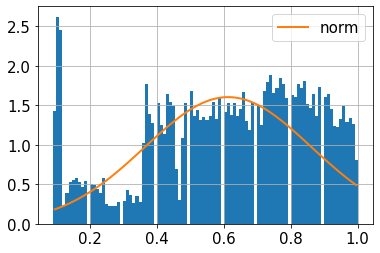

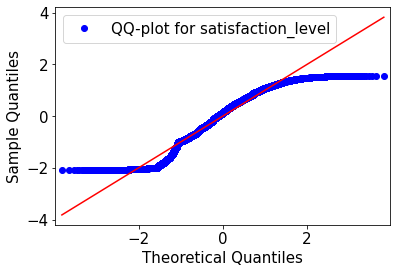

last_evaluation normality check 

Shapiro-Wilk normality test for last_evaluation
Statistics=0.952, p-value=0.0% 

Shapiro-Wilk: Sample does not look Gaussian (can reject H0) 

D’Agostino’s K^2 normality Test test for last_evaluation
Statistics=19704.807, p-value=0.0% 

D’Agostino’s: Sample does not look Gaussian (can reject H0) 



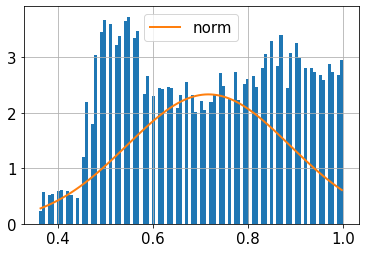

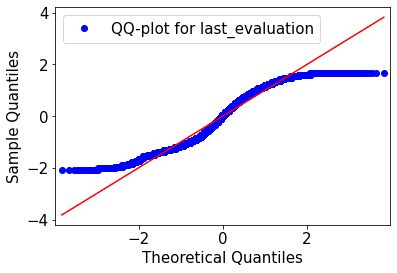

number_project normality check 

Shapiro-Wilk normality test for number_project
Statistics=0.922, p-value=0.0% 

Shapiro-Wilk: Sample does not look Gaussian (can reject H0) 

D’Agostino’s K^2 normality Test test for number_project
Statistics=550.359, p-value=0.0% 

D’Agostino’s: Sample does not look Gaussian (can reject H0) 



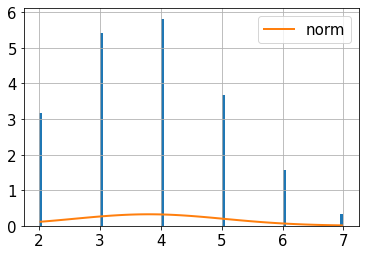

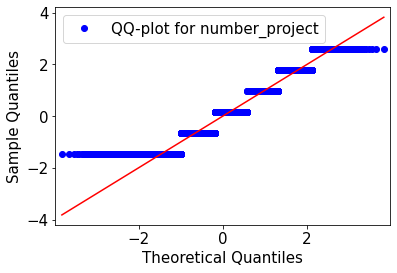

average_montly_hours normality check 

Shapiro-Wilk normality test for average_montly_hours
Statistics=0.963, p-value=0.0% 

Shapiro-Wilk: Sample does not look Gaussian (can reject H0) 

D’Agostino’s K^2 normality Test test for average_montly_hours
Statistics=7806.495, p-value=0.0% 

D’Agostino’s: Sample does not look Gaussian (can reject H0) 



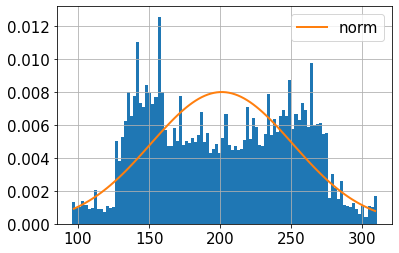

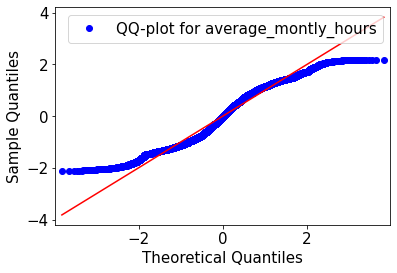

time_spend_company normality check 

Shapiro-Wilk normality test for time_spend_company
Statistics=0.793, p-value=0.0% 

Shapiro-Wilk: Sample does not look Gaussian (can reject H0) 

D’Agostino’s K^2 normality Test test for time_spend_company
Statistics=5642.288, p-value=0.0% 

D’Agostino’s: Sample does not look Gaussian (can reject H0) 



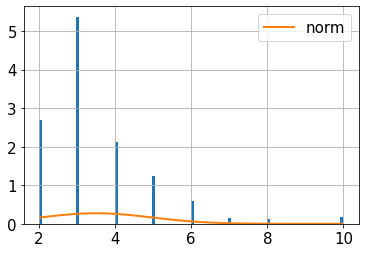

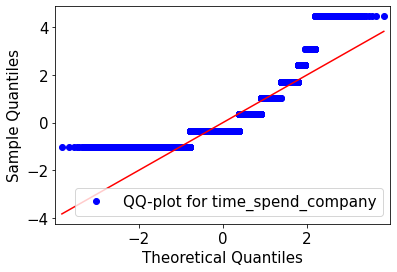

In [85]:
# Для каждой количественной фичи проводим проверку на нормальность
quant_column_names = hr_quant.columns.to_list()
for col in quant_column_names:
    statistical_normality_test(feature_name=col, df_name=hr_quant, alpha=0.05)
    visual_normality_check(feature_name=col, df_name=hr_quant)


Вывод: значения признаков не распределены нормально


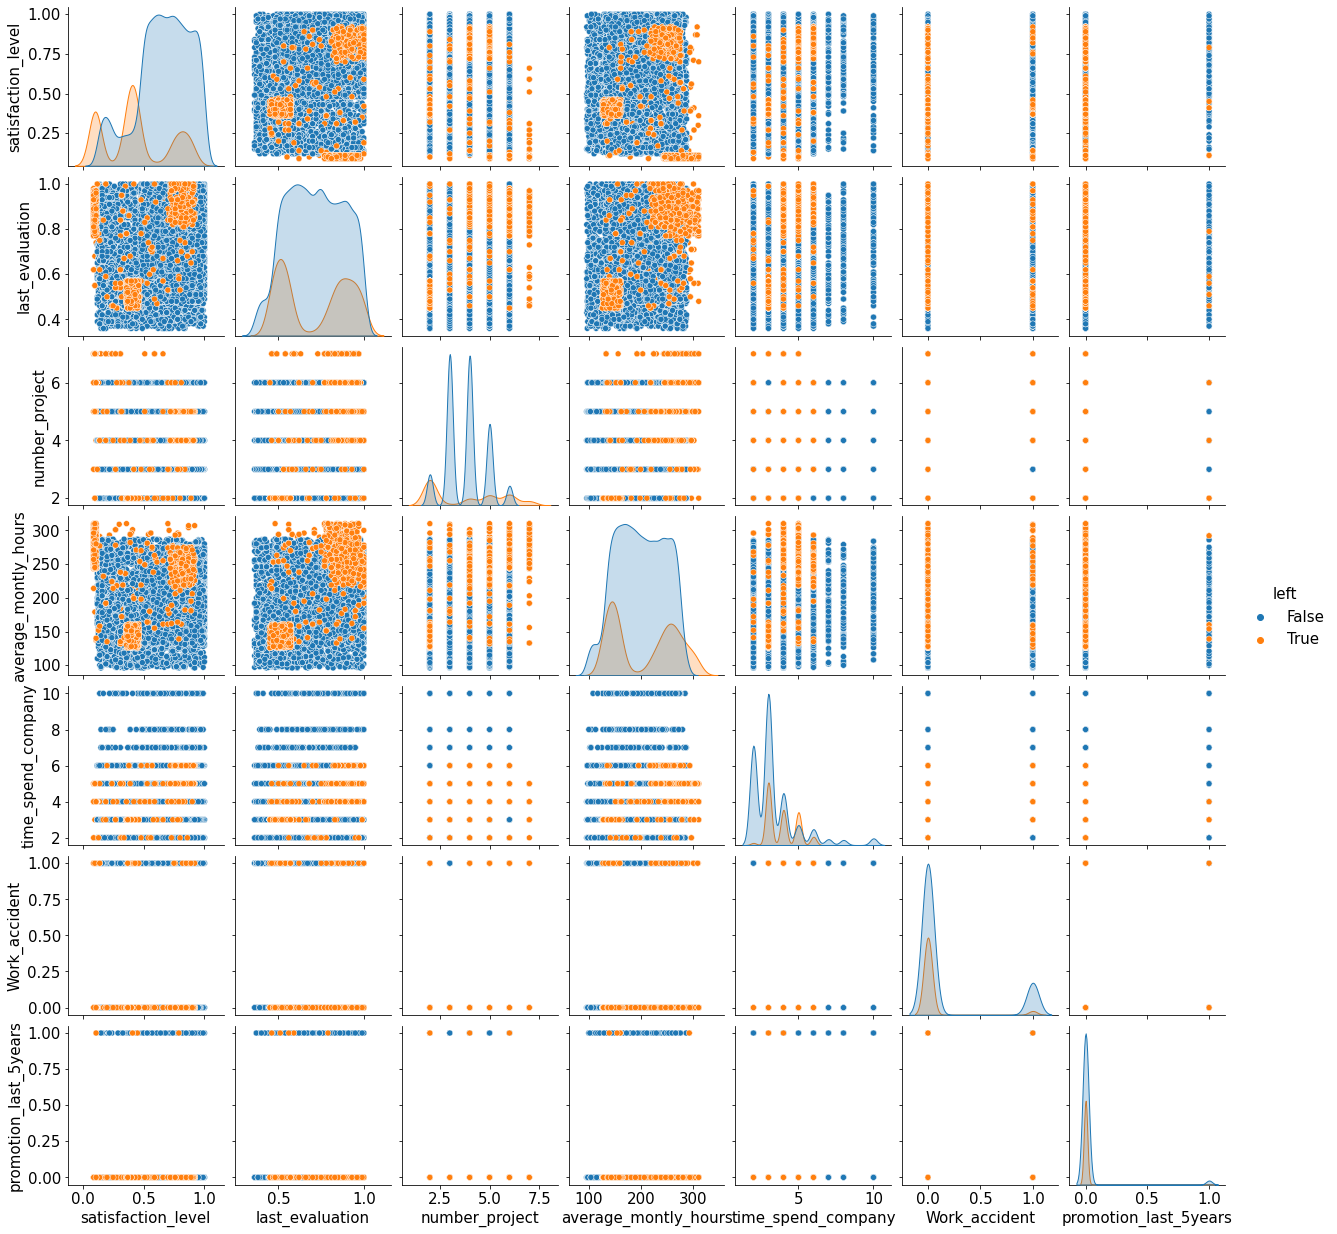

<Figure size 1440x1440 with 0 Axes>

<Figure size 1351.88x1260 with 0 Axes>

In [89]:
# Посмотрим соответствуют ли наши данные условиям для расчета коэф.Пирсона - линейность
from IPython.display import Image

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,20))

# С помощью цвета отображаем переменную left (уволился сотрудник или нет), для большей информативности
sns_plot = sns.pairplot(data=hr_df, hue='left')
# Сохраняем данные изображение без построения и вывода графика на экран
sns_plot.savefig("pairplot.png")

plt.clf() # Clean parirplot figure from sns
Image(filename='pairplot.png') # Show pairplot as image


**Вывод**: визуально линейной взаимосвязи между значениями признаков нет.
Имеющиеся графики не могут дать четкого представления о характере взаимосвязи между признаками.
Скорее всего признаки практически не скоррелированы.

Учитывая, что признаки не распределены, нормально мы не можем использовать коэф. Пирсона.
Для анализа корреляции можно использовать непараметрический метод, например, коэф. Спирмена.

Хотя при отсутствии линейной взаимосвязи рассчитывать корреляцию (которая подразумевает линейную взаимосвязь) смысла нет,
корреляция будет незначительной, а ее характер случайный или обусловленный влиянием третьей переменной.


<AxesSubplot:>

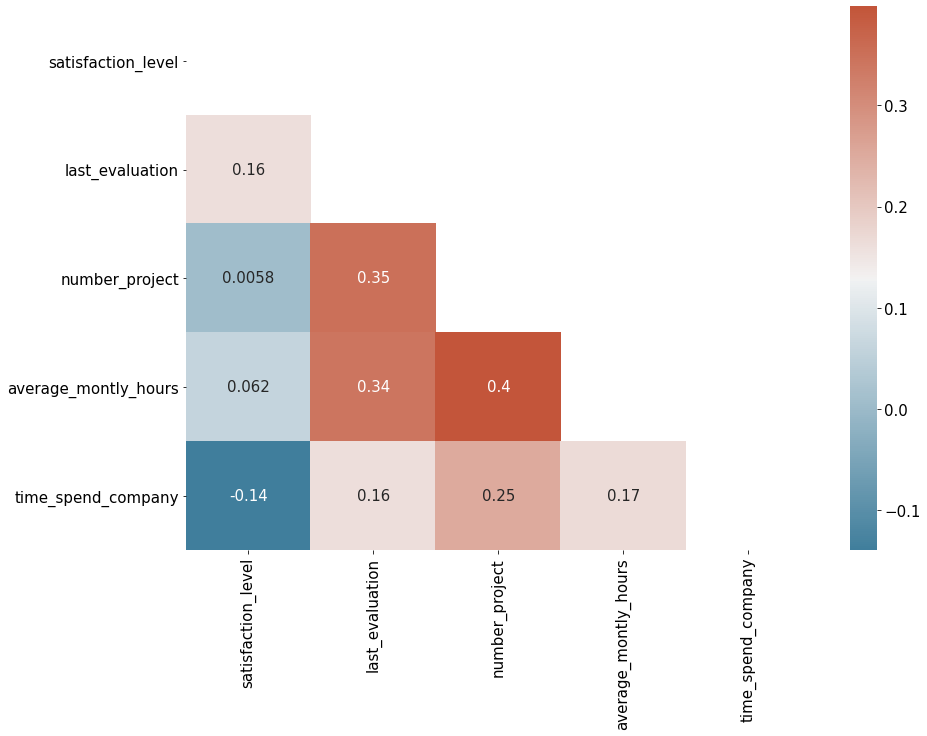

In [94]:
# Рассчитываем корреляцию с использованием коэф. Спирмена
hr_df_corr = hr_quant.corr(method='spearman')

# Строим основу для графика
fig, ax = plt.subplots(figsize=(14,10))

# Сделаем маску скрытия повторов
mask = np.triu(np.ones_like(hr_df_corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Выводим хитмап с корреляцией
sns.heatmap(hr_df_corr, ax=ax, annot=True, mask=mask, cmap=cmap)

Визуализация матрицы корреляций подтверждает наш предыдущий вывод - корреляция действительно незначительна.

In [96]:
# Для определения двух самые скоррелированных и нескоррелированных переменных
# преобразуем матрицу корреляции в дф пар переменных и значений их корреляции


corr_pairs = hr_df_corr.abs()\
    .where(
        np.triu(np.ones(hr_df_corr.shape), k=1).astype(bool)
            ).stack()\
            .reset_index()

corr_pairs.columns = ['feature1', 'feature2', 'abs_correlation']
corr_pairs.style.background_gradient(cmap='Blues')

# 1. Создаем единичную матрицу той же размерности, что и hr_df_corr, трансформируем в верхнетриугольную
#   заменяем 0 и 1 на булевые
# 2. Применяем функцию, которая заменяет значения на NaN там, где не совпадает условие (condition is false),
#   т.е заменяем в исходной матрице значения до диагонали включительно на NaN
# 3. Stack - "сворачивает" колонки во второй уровень индекса, удаляет строки с Nan,
#   получаем пары признаков, удаляем повторы
# 4. Сбрасываем индекс

,feature1,feature2,abs_correlation
0,satisfaction_level,last_evaluation,0.162407
1,satisfaction_level,number_project,0.005786
2,satisfaction_level,average_montly_hours,0.062000
3,satisfaction_level,time_spend_company,0.139428
4,last_evaluation,number_project,0.350399
5,last_evaluation,average_montly_hours,0.342061
6,last_evaluation,time_spend_company,0.161154
7,number_project,average_montly_hours,0.397855
8,number_project,time_spend_company,0.251971
9,average_montly_hours,time_spend_company,0.168750


In [97]:
# Выбираем самые скоррелированные и нескоррелированные пары признаков
min_corr = corr_pairs[ corr_pairs.abs_correlation == corr_pairs.abs_correlation.min() ]
max_corr = corr_pairs[ corr_pairs.abs_correlation == corr_pairs.abs_correlation.max() ]

print(
    f'Minimal correlation is {round(min_corr.iloc[0,2], 5)} for features: {min_corr.iloc[0,0]} and {min_corr.iloc[0,1]} \n'
    f'Maximal correlation is {round(max_corr.iloc[0,2], 5)} for features: {max_corr.iloc[0,0]} and {max_corr.iloc[0,1]}'
)


Minimal correlation is 0.00579 for features: satisfaction_level and number_project 
Maximal correlation is 0.39786 for features: number_project and average_montly_hours


## 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [98]:
# Способ 1
employee_by_dep = pd.DataFrame(hr_df['department'].value_counts())
employee_by_dep.reset_index(inplace=True)
employee_by_dep.columns = ['department', 'number_of_employee']
employee_by_dep.style.background_gradient(cmap='Blues')

,department,number_of_employee
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


In [99]:
# Способ 2
employee_by_dep2 = pd.DataFrame(hr_df.groupby(['department'])['satisfaction_level'].count())\
    .sort_values(by='satisfaction_level', ascending=False)
employee_by_dep2.reset_index(inplace=True)
employee_by_dep2.columns = ['department', 'number_of_employee']
employee_by_dep2.style.background_gradient(cmap='Blues')

,department,number_of_employee
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


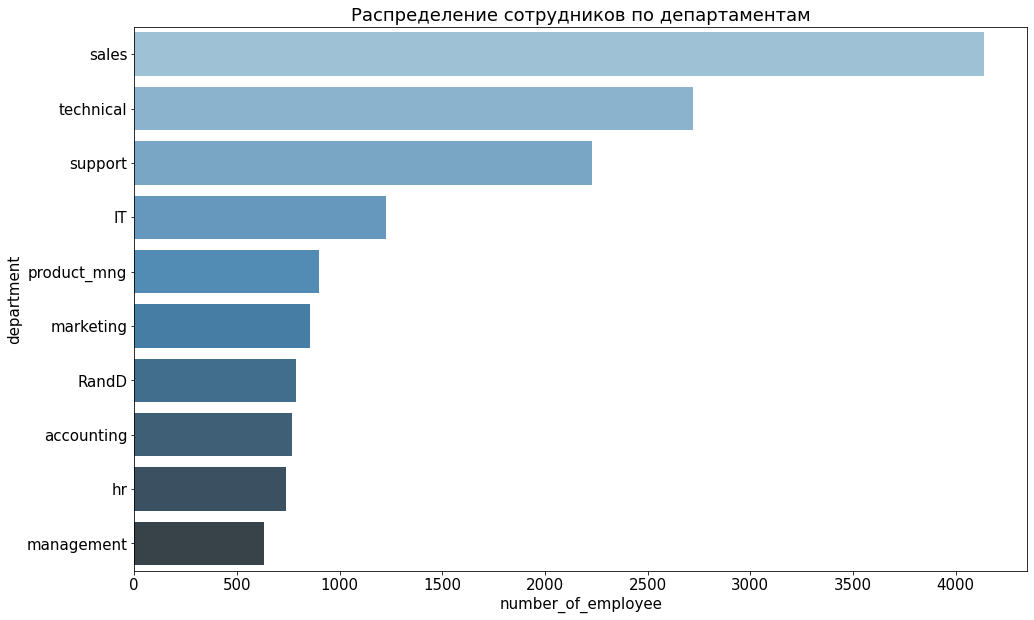

In [119]:
# Построим барплот, чтобы получить визуальную интуицию
plt.figure(figsize=(16,10))
sns.barplot(
    data=employee_by_dep2,
    y='department',
    x='number_of_employee',
    palette="Blues_d"
).set_title('Распределение сотрудников по департаментам')

plt.show()


## 5. Показать распределение сотрудников по зарплатам.

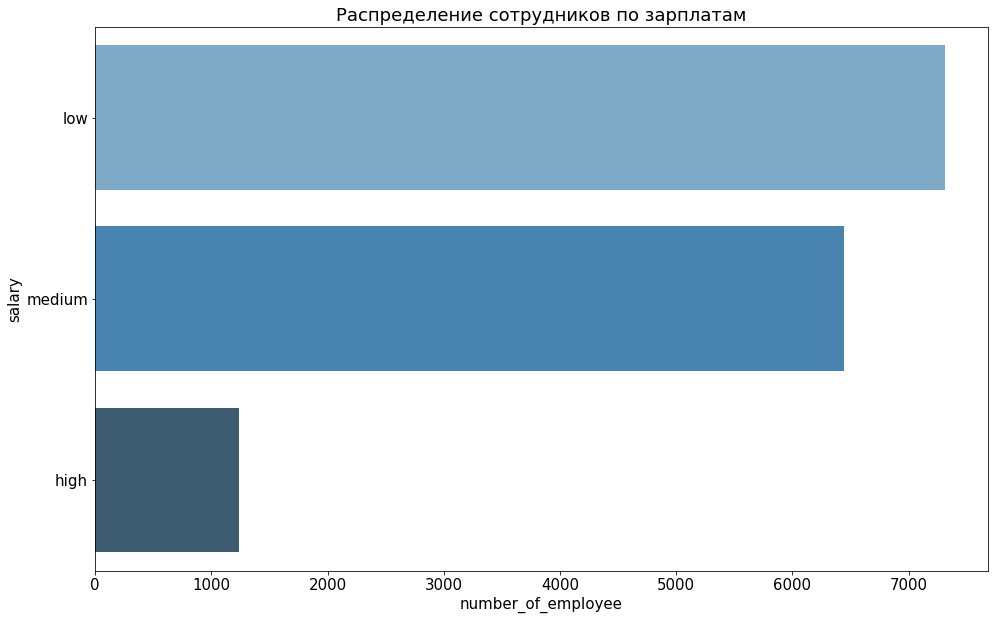

In [121]:
# Строим датафрейм: группируем записи по значениям salary, считаем количество в каждой, сортируем по убыванию
employee_by_salary = pd.DataFrame(hr_df.groupby(['salary'])['satisfaction_level'].count())\
    .sort_values(by='satisfaction_level', ascending=False)
employee_by_salary.reset_index(inplace=True)
employee_by_salary.rename(columns={'satisfaction_level': 'number_of_employee'}, inplace=True)

# Визуализируем с помощью барплоьа
fig = plt.figure(figsize=(16,10))
sns.barplot(
    data=employee_by_salary,
    y='salary',
    x='number_of_employee',
    palette="Blues_d"
).set_title('Распределение сотрудников по зарплатам')
plt.show()


## 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [126]:
# Строим датафрейм: группируем записи по значениям department и salary,
# считаем количество в каждой, сортируем по убыванию
employee_by_salary_dep = pd.DataFrame(hr_df.groupby(['department' ,'salary'])['satisfaction_level'].count())\
    .sort_values(by='satisfaction_level', ascending=False)

employee_by_salary_dep.rename(columns={'satisfaction_level': 'number_of_employee'}, inplace=True)
employee_by_salary_dep = employee_by_salary_dep.unstack()
employee_by_salary_dep.rename(columns={'high':'high_salary', 'medium':'medium_salary', 'low':'low_salary'}, inplace=True)
employee_by_salary_dep = employee_by_salary_dep['number_of_employee'][['high_salary', 'medium_salary', 'low_salary']]

# С помощью цвета показываем распределение зарплат внутри департаментов
employee_by_salary_dep.style.background_gradient(cmap='Blues', axis=1)\
    .set_caption('Amount of employees receive high, medium and low salaries by departments')


salary,high_salary,medium_salary,low_salary
department,,,
IT,83,535,609
RandD,51,372,364
accounting,74,335,358
hr,45,359,335
management,225,225,180
marketing,80,376,402
product_mng,68,383,451
sales,269,1772,2099
support,141,942,1146


<Figure size 432x288 with 0 Axes>

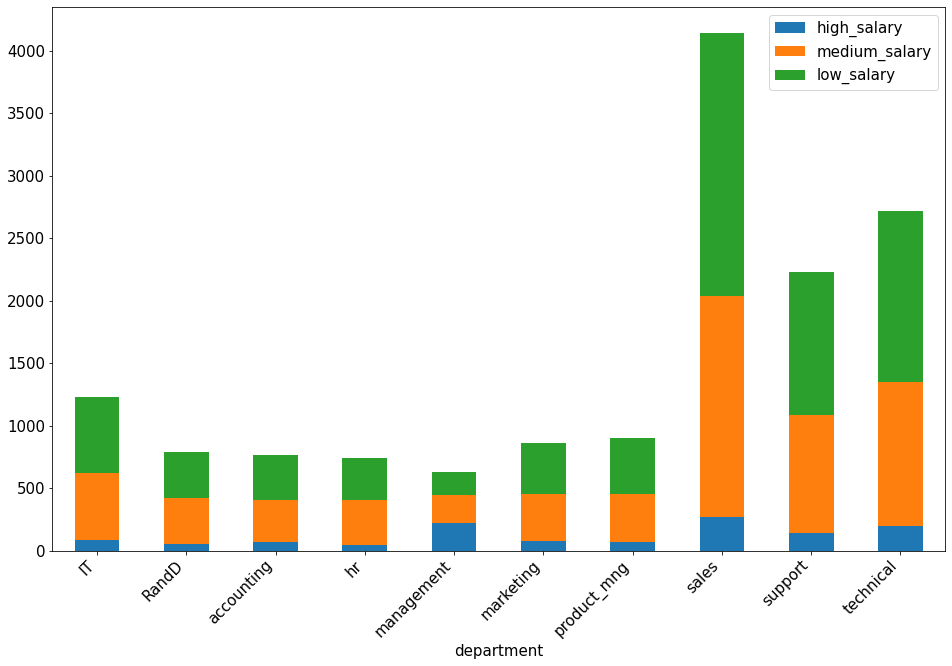

In [131]:
# посмотрим подробнее на распределение зарплат внутри департаментов

labels = [x for x in employee_by_salary_dep.columns]
plt.figure()

employee_by_salary_dep.plot.bar(
    stacked=True,
    figsize=(16,10)
)

plt.xticks(rotation=45, ha='right')
plt.legend(labels)

plt.show()


## 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [134]:
# Разделим дф на 2 части по условию - высокий и низкий оклад, оставим только колонку average_monthly_hours

# Низкий оклад
low_salary = pd.DataFrame(hr_df[ hr_df['salary'] == 'low' ]['average_montly_hours'])
low_salary.columns = ['low_salary_aver_monthly_hours']

# Высокий оклад
high_salary = pd.DataFrame(hr_df[ hr_df['salary'] == 'high' ]['average_montly_hours'])
high_salary.columns = ['high_salary_aver_monthly_hours']


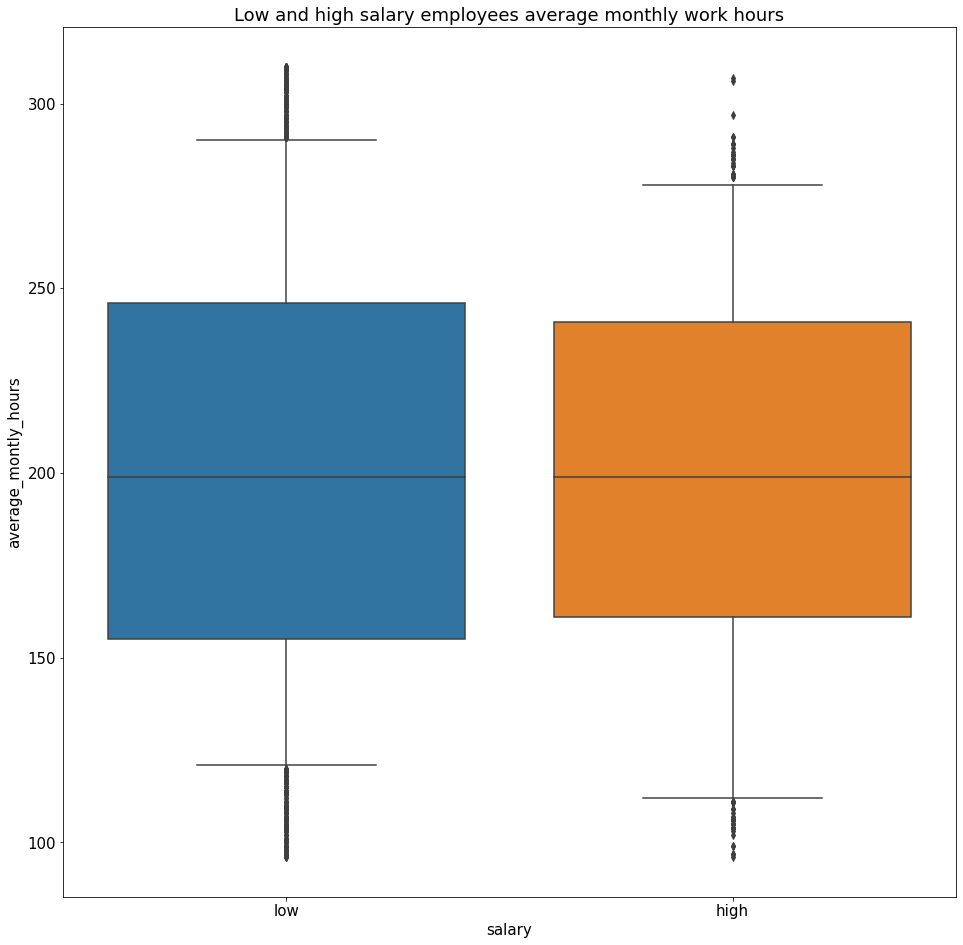

In [135]:
# Визуализируем медиану и доверительные интервалы,
# чтобы посмотреть как пересекаются средние и доверительные интервалы двух выборок

plt.figure(figsize=(16,16))

sns.boxplot(
    y='average_montly_hours',
    x='salary',
    data=hr_df[hr_df['salary'] != 'medium'],
    whis=[2.5, 97.5]
)
plt.title('Low and high salary employees average monthly work hours')
plt.show()

# Судя по графику, наличие статистически значимых различий между двумя выборками маловероятно

Условия применения t-test:
- Гомогенность дисперсий - дисперсии внутри групп должны быть примерно одинаковыми
(для проверки: критерий Левина, критерий Фишера)
- Нормальность распределения при объеме выборки n< 30


low_salary_aver_monthly_hours normality check 

Shapiro-Wilk normality test for low_salary_aver_monthly_hours
Statistics=0.96, p-value=0.0% 

Shapiro-Wilk: Sample does not look Gaussian (can reject H0) 

D’Agostino’s K^2 normality Test test for low_salary_aver_monthly_hours
Statistics=4477.067, p-value=0.0% 

D’Agostino’s: Sample does not look Gaussian (can reject H0) 



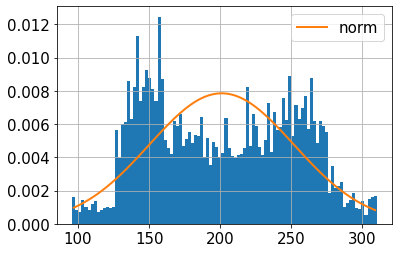

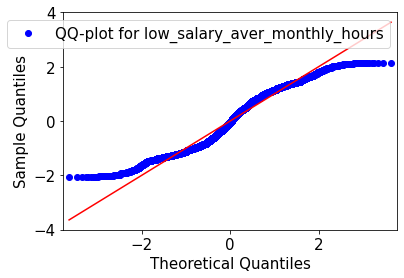

high_salary_aver_monthly_hours normality check 

Shapiro-Wilk normality test for high_salary_aver_monthly_hours
Statistics=0.971, p-value=0.0% 

Shapiro-Wilk: Sample does not look Gaussian (can reject H0) 

D’Agostino’s K^2 normality Test test for high_salary_aver_monthly_hours
Statistics=339.678, p-value=0.0% 

D’Agostino’s: Sample does not look Gaussian (can reject H0) 



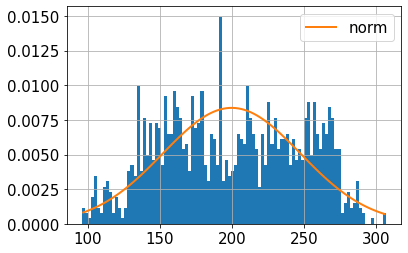

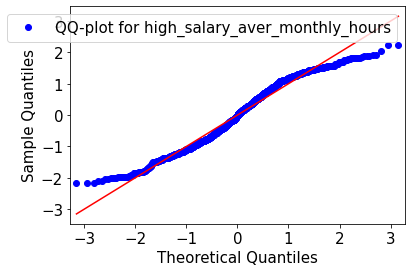

In [136]:
# Делаем проверку на нормальность
statistical_normality_test(feature_name='low_salary_aver_monthly_hours', df_name=low_salary, alpha=0.05)
visual_normality_check(feature_name='low_salary_aver_monthly_hours', df_name=low_salary)

statistical_normality_test(feature_name='high_salary_aver_monthly_hours', df_name=high_salary, alpha=0.05)
visual_normality_check(feature_name='high_salary_aver_monthly_hours', df_name=high_salary)

Распределения признаков не являются нормальными, но учитывая объем выборок, этим условием можно пренебречь

In [137]:
# Делаем проверку на гомогенность дисперсий
W, p_lev = st.levene(low_salary['low_salary_aver_monthly_hours'], high_salary['high_salary_aver_monthly_hours'])
print(
          f'Levene test for variances equality for low_salary and high_salary\n'
          f'Statistics={np.round(W, 3)}, p-value={np.round(p_lev, 3)} \n'
     )

alpha = 0.05
if p_lev > alpha:
    print('Levene: Samples have equal variances (fail to reject H0) \n')
else:
    print('Levene: Samples variances are not equal (can reject H0) \n')

Levene test for variances equality for low_salary and high_salary
Statistics=21.774, p-value=0.0 

Levene: Samples variances are not equal (can reject H0) 



Дисперсия значений двух выборок не гомогенна, необходимо использовать т-тест с поправкой Уэлча

Проверяем гипотезу с помощью t-теста с поправкой Уэлча

  **H0** : между двумя выборками нет статистически значимых различий -
    работники с низким и высоким окладом работают одинаковое количество часов

  **H1**: между двумя выборками есть статистически значимые различия -
    работники проводят на работе разное количество часов

In [138]:
T, p_w = st.ttest_ind(low_salary, high_salary, equal_var = False)

print(
        f'Independent Welch t-test for low_salary and high_salary\n'
        f'Statistics={np.round(T, 3)[0]}, p-value={np.round(p_w, 3)[0]} \n'
    )
# welch t-test interpret
alpha = 0.05

if p_w > alpha:
    print('Independent Welch t-test: Samples has no statistically significant difference (fail to reject H0) \n')
else:
    print('Independent Welch t-test: Sample statistically different (reject H0) \n')

Independent Welch t-test for low_salary and high_salary
Statistics=0.762, p-value=0.446 

Independent Welch t-test: Samples has no statistically significant difference (fail to reject H0) 



**Вывод:** статистический тест подтвердил визуальный анализ - между двумя выборками нет статистически значимой разницы,
у нас недостаточно оснований отвергнуть нулевую гипотезу о равенстве двух средних.

Таким образом у нас **нет оснований считать**, что сотрудники с высоким окладом проводят на работе больше (или меньше) времени,
чем сотрудники с низким окладом.


### 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
    - Доля сотрудников с повышением за последние 5 лет
    - Средняя степень удовлетворенности
    - Среднее количество проектов


In [141]:
# Сделаем сводную таблицу
len_hr = len(hr_df['promotion_last_5years'])

table = pd.pivot_table(hr_df,
                       values=['promotion_last_5years', 'satisfaction_level', 'number_project'],
                       index=['left'],
                       aggfunc={
                           'promotion_last_5years': lambda x: np.sum(x)/(len_hr/100),
                           'satisfaction_level': np.mean,
                           'number_project': np.mean
                       }
                       )

table.rename(columns={
    'number_project': 'number_project(mean)',
    'promotion_last_5years': 'promotion_last_5years(%)',
    'satisfaction_level': 'satisfaction_level(mean)'
    }, 
    index={0: 'stayed', 1: 'left_the_job'},
    inplace=True)

table.style.background_gradient(cmap='Blues')


,number_project(mean),promotion_last_5years(%),satisfaction_level(mean)
left,,,
stayed,3.786664,2.000133,0.666810
left_the_job,3.855503,0.126675,0.440098


In [145]:
#Детализируем полученные данные по уровню зарплаты

table = pd.pivot_table(hr_df,
                       values=['promotion_last_5years', 'satisfaction_level', 'number_project'],
                       index=['left', 'salary'],
                       aggfunc={
                           'promotion_last_5years': lambda x: np.sum(x)/(len_hr/100),
                           'satisfaction_level': np.mean,
                           'number_project': np.mean
                       }
                       )

table.rename(columns={
    'number_project': 'number_project(mean)',
    'promotion_last_5years': 'promotion_last_5years(%)',
    'satisfaction_level': 'satisfaction_level(mean)'
    },
    index={0: 'stayed', 1: 'left'},
    inplace=True)

table.style.background_gradient(cmap='Blues', axis=0)


## 9. Разделить данные на тестовую и обучающую выборки.
## Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).
## Оценить качество модели на тестовой выборки


In [146]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

### What is LDA and how it works?

Linear Discriminant Analysis (LDA) is a dimensionality reduction technique.
Dimensionality reduction techniques reduce the number of dimensions (i.e. variables)
in a dataset while retaining as much information as possible.

Linear Discriminant Analysis, or LDA, uses the information from both features to create a new axis
and projects the data on to the new axis in such a way as to minimizes the variance and maximizes the distance
between the means of the two classes (eigen-vectors and eigen-values).


Так как LDA - линейна, то необходимо провести проверку на коллинеарность и исключить вектора (признаки),
имеющие высокую корреляцию с другими.

Из задания 3 мы знаем, что линейной зависимости между данными практически нет,
поэтому можем оставить датасет в текущем виде.

In [161]:
#подготовка датасета, убираем все не количественные переменные

X = hr_df.drop(columns=['department', 'salary', 'left'])
y = hr_df['left'].astype(int)


In [162]:
# делим данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# создаем и обучаем модель
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Делаем предсказание
y_pred = lda.predict(X_test)


In [167]:
# Функция для оценки качества работы LDA
def evaluate_lda_model_result(lda, X_test, y_test, y_pred):
    '''
    Оценивает работу LDA модели;
    Делает расчет: среднеквадратичной ошибки, модуль среднего отклонения, accuracy score,
    доля зависимой переменной, объясняемой моделью;
    Строит confusion matrix и интерпретирует ее;
    :param lda: LDA model
    :param X_test: np.array
    :param y_test: np.array
    :param y_pred: np.array
    '''
    print(
    f'Среднеквадратичная ошибка: {round(mean_squared_error(y_test, y_pred), 3)} \n'
    f'Модуль среднего отклонения: {round(mean_absolute_error(y_test, y_pred), 3)} \n'
    f'Accuracy score: {round(accuracy_score(y_test, y_pred), 3)}'
    )

    print(
        f'Доля дисперсии зависимой переменной left, '
        f'объясняемая регрессионной моделью: {round(lda.score(X_test, y_test), 2)}% \n'
    )

    # строим confusion matrix
    coef_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=[0,1]))
    coef_matrix.columns = ['stayed_pred', 'left_pred']
    coef_matrix.index = ['stayed_true', 'left_true']

    print(coef_matrix)

    print(
        f'\nВсего в тестовых данных было: \n'
        f'Уволившихися: {len(y_test[y_test == 1 ])}, Оставшихся работать: {len(y_test[y_test == 0 ])} \n'
        f'Модель верно предсказала: \n'
        f'Уволившихся: {coef_matrix["left_pred"]["left_true"]} из {len(y_test[y_test == 1 ])}, '
        f'Оставшихся работать:{coef_matrix["stayed_pred"]["stayed_true"]} из {len(y_test[y_test == 0 ])} \n'
        f'Модель ошиблась: \n'
        f'Ложно-уволившиеся: {coef_matrix["left_pred"]["stayed_true"]}, '
        f'ложно-оставшиеся: {coef_matrix["stayed_pred"]["left_true"]}\n'
        f'True-False rate: \n'
        f'Уволившиеся: {round((coef_matrix["left_pred"]["left_true"])/(coef_matrix["stayed_pred"]["left_true"]), 3)}, '
        f'Оставшиеся: {round((coef_matrix["stayed_pred"]["stayed_true"])/(coef_matrix["left_pred"]["stayed_true"]), 3)}'
    )

In [164]:
evaluate_lda_model_result(lda, X_test, y_test, y_pred)

Среднеквадратичная ошибка: 0.244 
Модуль среднего отклонения: 0.244 
Accuracy score: 0.756
Доля дисперсии зависимой переменной left, объясняемая регрессионной моделью: 0.76% 

             stayed_pred  left_pred
stayed_true         3138        290
left_true            809        263

Всего в тестовых данных было: 
Уволившихися: 1072, Оставшихся работать: 3428 
Модель верно предсказала: 
Уволившихся: 263 из 1072, Оставшихся работать:3138 из 3428 
Модель ошиблась: 
Ложно-уволившиеся: 290, ложно-оставшиеся: 809
True-False rate: 
Уволившиеся: 0.325, Оставшиеся: 10.821


**Вывод**: наша модель достаточно хорошо определяет тех, кто останется работать и плохо определяет тех,
 кто уволится.


### Что можно изменить, чтобы улучшить результат?
- поменять параметр модели solver
- масштабировать все признаки от 0 до 1

In [165]:
#1.Изменим параметр

solvers = ['svd', 'lsqr', 'eigen']

for solver in solvers:
    lda.fit(X_train, y_train)
    # Делаем предсказание
    y_pred = lda.predict(X_test)
    print(f'\n\n\nОценка работы модели с параметром solver {solver}')
    evaluate_lda_model_result(lda, X_test, y_test, y_pred)





Оценка работы модели с параметром solver svd
Среднеквадратичная ошибка: 0.244 
Модуль среднего отклонения: 0.244 
Accuracy score: 0.756
Доля дисперсии зависимой переменной left, объясняемая регрессионной моделью: 0.76% 

             stayed_pred  left_pred
stayed_true         3138        290
left_true            809        263

Всего в тестовых данных было: 
Уволившихися: 1072, Оставшихся работать: 3428 
Модель верно предсказала: 
Уволившихся: 263 из 1072, Оставшихся работать:3138 из 3428 
Модель ошиблась: 
Ложно-уволившиеся: 290, ложно-оставшиеся: 809
True-False rate: 
Уволившиеся: 0.325, Оставшиеся: 10.821



Оценка работы модели с параметром solver lsqr
Среднеквадратичная ошибка: 0.244 
Модуль среднего отклонения: 0.244 
Accuracy score: 0.756
Доля дисперсии зависимой переменной left, объясняемая регрессионной моделью: 0.76% 

             stayed_pred  left_pred
stayed_true         3138        290
left_true            809        263

Всего в тестовых данных было: 
Уволившихися: 10

Изменение параметров LDA оставляет работу модели неизменной.

In [166]:
#2.Попробуем заскейлить фичи
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Делаем предсказание
y_pred = lda.predict(X_test)

# Сравним результаты
evaluate_lda_model_result(lda, X_test, y_test, y_pred)

Среднеквадратичная ошибка: 0.244 
Модуль среднего отклонения: 0.244 
Accuracy score: 0.756
Доля дисперсии зависимой переменной left, объясняемая регрессионной моделью: 0.76% 

             stayed_pred  left_pred
stayed_true         3138        290
left_true            809        263

Всего в тестовых данных было: 
Уволившихися: 1072, Оставшихся работать: 3428 
Модель верно предсказала: 
Уволившихся: 263 из 1072, Оставшихся работать:3138 из 3428 
Модель ошиблась: 
Ложно-уволившиеся: 290, ложно-оставшиеся: 809
True-False rate: 
Уволившиеся: 0.325, Оставшиеся: 10.821


Масштабирование так же не влияет на результаты работы модели.

**Вывод:** если задача модели предсказывать кто из сотрудников может уволиться, то работа модели неудовлетворительна.
Вероятно, это связано с тем, что связь между данными не носит линейного характера, а корреляция между переменными и
целевым признаком незначительна и скорее всего случайна.
Возможно, для предсказания увольнений стоит использовать нелинейные модели.
